commands:
    
```bash
python -u main.py --dataset=nist --trainer='fedavg'  \
                --learning_rate=0.01 --num_rounds=200 --Ls0=1 \
                --eval_every=1 --batch_size=10 \
                --num_epochs=1 \
                --model=cnn \
                --drop_percent=0 \
                --clients_per_round=10 \
                --sim_metric='grad' --m_interval=1 \
                --clientsel_algo='<ALGO>'
```
where **ALGO** = ['*submodular*' (divfl), '*lossbased*' (power-of-choice), '*random*']

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
file_name1 = '../results/nist/submodular.csv'
file_name2 = '../results/nist/lossbased.csv'
file_name3 = '../results/nist/random.csv'
HEADER = ['test_accuracies', 'train_accuracies', 'train_losses', 'num_sampled']
df1 = pd.read_csv(file_name1, header=None, names=HEADER)
df2 = pd.read_csv(file_name2, header=None, names=HEADER)
df3 = pd.read_csv(file_name3, header=None, names=HEADER)
df1.head()

,test_accuracies,train_accuracies,train_losses,num_sampled
0,0.121102,0.124536,2.343126,10.0
1,0.132017,0.137020,2.380427,10.0
2,0.132017,0.137020,2.416474,10.0
3,0.132017,0.137020,2.409984,10.0
4,0.094595,0.088302,2.346838,10.0


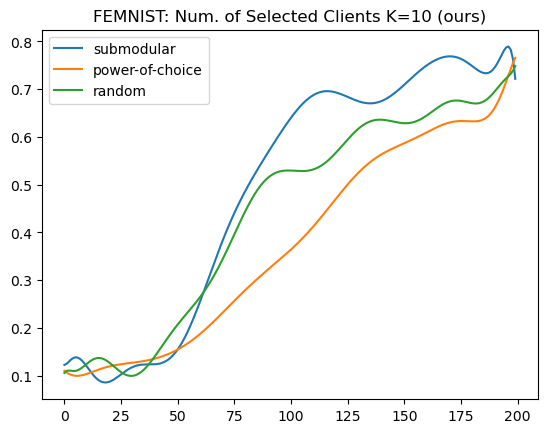

In [18]:
x = df1.index.tolist()

# ref: https://stackoverflow.com/a/46634139
poly1 = np.polyfit(x, df1['test_accuracies'], 15)
poly_y1 = np.poly1d(poly1)(x)

poly2 = np.polyfit(x, df2['test_accuracies'], 15)
poly_y2 = np.poly1d(poly2)(x)

poly3 = np.polyfit(x, df3['test_accuracies'], 15)
poly_y3 = np.poly1d(poly3)(x)

# plt.plot(df1['test_accuracies'], label='submodular')
plt.plot(poly_y1, label='submodular')

# plt.plot(df2['test_accuracies'], label='power-of-choice')
plt.plot(poly_y2, label='power-of-choice')

# plt.plot(df3['test_accuracies'], label='random')
plt.plot(poly_y3, label='random')

plt.title("FEMNIST: Num. of Selected Clients K=10 (ours)")
plt.legend()

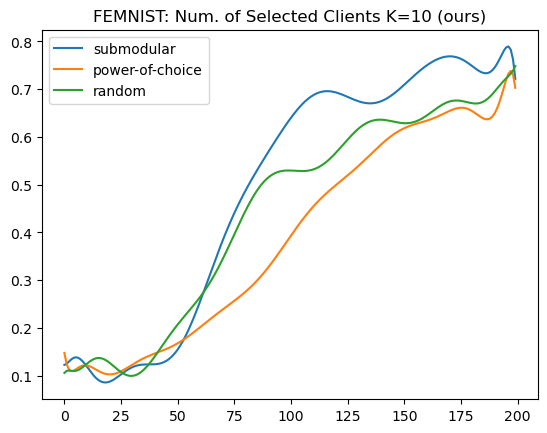

In [4]:
x = df1.index.tolist()

# ref: https://stackoverflow.com/a/46634139
poly1 = np.polyfit(x, df1['test_accuracies'], 15)
poly_y1 = np.poly1d(poly1)(x)

poly2 = np.polyfit(x, df2['test_accuracies'], 15)
poly_y2 = np.poly1d(poly2)(x)

poly3 = np.polyfit(x, df3['test_accuracies'], 15)
poly_y3 = np.poly1d(poly3)(x)

# plt.plot(df1['test_accuracies'], label='submodular')
plt.plot(poly_y1, label='submodular')

# plt.plot(df2['test_accuracies'], label='power-of-choice')
plt.plot(poly_y2, label='power-of-choice')

# plt.plot(df3['test_accuracies'], label='random')
plt.plot(poly_y3, label='random')

plt.title("FEMNIST: Num. of Selected Clients K=10 (ours)")
plt.legend()

<AxesSubplot:ylabel='test_accuracies'>

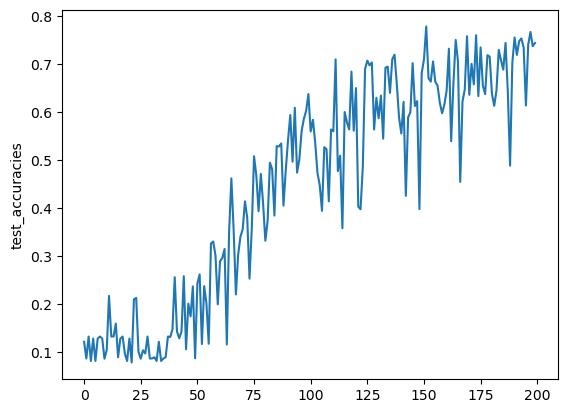

In [15]:
sns.lineplot(data=df3, y='test_accuracies', x=df1.index)

<AxesSubplot:ylabel='train_losses'>

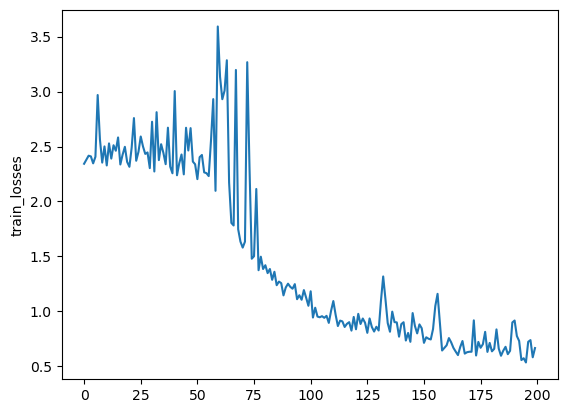

In [17]:
sns.lineplot(data=df, y='train_losses', x=df.index)